## Test transforms for SOM bbSelect

- This notebook analyses the bbSelect tests with respect to the transforms that are used in the SOM
- The results are shown as line plots

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Visualisation settings
plt.rcParams['figure.figsize'] = [12,8]
sns.set(font_scale=1.2)
sns.set_style("darkgrid")

In [2]:
# Import test results
coverage_testing = pd.read_csv('../data/coverage_tests/coverage_testing_bbSelect_parameters.csv')

# Tidy up the table for analysis
coverage_testing.rename({'method':'_method'}, axis = 1, inplace = True)
for i, line in coverage_testing.iterrows():
    if line['_method'] in ['som','classic']:
        if line['use_coverage']:
            coverage_testing.loc[i, 'method'] = line['_method']+'_coverage'
        else:
            coverage_testing.loc[i, 'method'] = line['_method']
    else:
        coverage_testing.loc[i, 'method'] = line['_method']
    
    if line['_method'] in ['som']:
        if line['flat_som'] == True:
            coverage_testing.loc[i, 'SOM transform'] = 'to 10'
        else:
            coverage_testing.loc[i, 'SOM transform'] = 'log base2'

In [3]:
coverage_testing

,n_select,_method,use_coverage,flat_som,Donor,Acceptor,NegIonizable,PosIonizable,Aromatic,Hydrophobe,MPO_mean,MPO_std,method,SOM transform
0,12,som,True,True,23,23,19,9,8,19,0.168131,0.074620,som_coverage,to 10
1,12,som,True,False,23,23,19,9,8,19,0.168131,0.074620,som_coverage,log base2
2,12,som,False,True,23,23,19,4,8,11,0.156208,0.088136,som,to 10
3,12,som,False,False,23,23,19,9,8,11,0.156382,0.088135,som,log base2
4,12,classic,True,False,23,23,19,9,8,19,0.163466,0.079019,classic_coverage,NaN
5,12,classic,False,False,23,23,19,4,1,11,0.147735,0.094123,classic,NaN
6,24,som,True,True,28,32,28,18,18,27,0.181501,0.065603,som_coverage,to 10
7,24,som,True,False,26,30,23,19,18,32,0.183608,0.064946,som_coverage,log base2
8,24,som,False,True,28,31,28,17,16,18,0.171749,0.077063,som,to 10
9,24,som,False,False,26,30,23,18,16,27,0.175438,0.075883,som,log base2


In [4]:
# Get the pharmacophore columns
pharmacophore_columns = 'Donor,Acceptor,NegIonizable,PosIonizable,Aromatic,Hydrophobe'.split(',')

In [5]:
# Calculate the average coverage
coverage_testing['average_coverage'] = coverage_testing[pharmacophore_columns].mean(axis = 1)

## Compare transform methods
- log base2 transforms the values used to train the SOM to log base2
- to 10 transforms the values used to train the som to 10

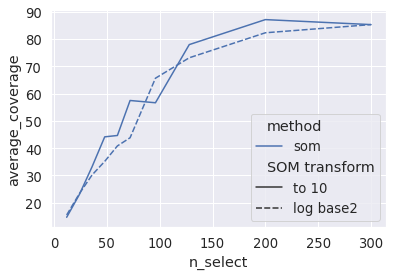

In [6]:
fig = sns.lineplot(data = coverage_testing.query('method == "som"'), x='n_select', y = 'average_coverage', hue = 'method', style = 'SOM transform')

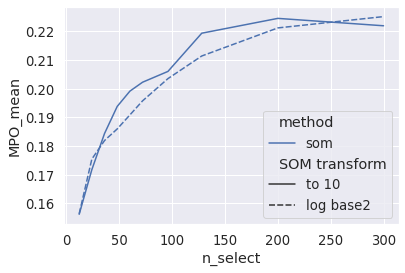

In [7]:
fig = sns.lineplot(data = coverage_testing.query('method == "som"'), x='n_select', y = 'MPO_mean', hue = 'method', style = 'SOM transform')

## Conclusion
- There is very little difference between the transforms used in the SOM
- By default, the log base2 transform will be used as it offers diversity from the classic partitioning